In [2]:
import numpy as np
from scipy.stats import boxcox, yeojohnson
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv("merged_data.csv")

In [4]:
data.shape

(1832252, 33)

In [5]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'FlightDate',
       'OriginAirportID', 'Origin', 'DestAirportID', 'Dest', 'CRSDepTime',
       'DepTime', 'DepDelayMinutes', 'DepDel15', 'CRSArrTime', 'ArrTime',
       'ArrDelayMinutes', 'ArrDel15', 'rounded_CRSDepTime', 'WindSpeedKmph',
       'WindDirDegree', 'WeatherCode', 'precipMM', 'Visibilty', 'Pressure',
       'Cloudcover', 'DewPointF', 'WindGustKmph', 'tempF', 'WindChillF',
       'Humidity', 'date', 'time', 'airport'],
      dtype='object')

In [6]:
data.nunique()

Year                     2
Quarter                  4
Month                   12
DayofMonth              31
FlightDate             731
OriginAirportID         15
Origin                  15
DestAirportID           15
Dest                    15
CRSDepTime            1225
DepTime               1430
DepDelayMinutes       1075
DepDel15                 2
CRSArrTime            1394
ArrTime               1440
ArrDelayMinutes       1073
ArrDel15                 2
rounded_CRSDepTime      23
WindSpeedKmph           56
WindDirDegree          361
WeatherCode             43
precipMM               214
Visibilty               21
Pressure                63
Cloudcover             101
DewPointF               98
WindGustKmph            82
tempF                  131
WindChillF             146
Humidity                98
date                   731
time                    23
airport                 15
dtype: int64

In [7]:
data.isnull().sum()

Year                  0
Quarter               0
Month                 0
DayofMonth            0
FlightDate            0
OriginAirportID       0
Origin                0
DestAirportID         0
Dest                  0
CRSDepTime            0
DepTime               0
DepDelayMinutes       0
DepDel15              0
CRSArrTime            0
ArrTime               0
ArrDelayMinutes       0
ArrDel15              0
rounded_CRSDepTime    0
WindSpeedKmph         0
WindDirDegree         0
WeatherCode           0
precipMM              0
Visibilty             0
Pressure              0
Cloudcover            0
DewPointF             0
WindGustKmph          0
tempF                 0
WindChillF            0
Humidity              0
date                  0
time                  0
airport               0
dtype: int64

In [8]:
data.dtypes

Year                    int64
Quarter                 int64
Month                   int64
DayofMonth              int64
FlightDate             object
OriginAirportID         int64
Origin                 object
DestAirportID           int64
Dest                   object
CRSDepTime              int64
DepTime               float64
DepDelayMinutes       float64
DepDel15              float64
CRSArrTime              int64
ArrTime               float64
ArrDelayMinutes       float64
ArrDel15              float64
rounded_CRSDepTime      int64
WindSpeedKmph           int64
WindDirDegree           int64
WeatherCode             int64
precipMM              float64
Visibilty               int64
Pressure                int64
Cloudcover              int64
DewPointF               int64
WindGustKmph            int64
tempF                   int64
WindChillF              int64
Humidity                int64
date                   object
time                    int64
airport                object
dtype: obj

In [9]:
numeric_cols = [
    'Year', 'Quarter', 'Month', 'DayofMonth', 'OriginAirportID', 'DestAirportID', 'CRSDepTime', 
    'DepTime', 'DepDelayMinutes', 'DepDel15', 'CRSArrTime', 'ArrTime', 'ArrDelayMinutes', 'ArrDel15', 
    'rounded_CRSDepTime', 'WindSpeedKmph', 'WindDirDegree', 'WeatherCode', 'precipMM', 'Visibilty', 
    'Pressure', 'Cloudcover', 'DewPointF', 'WindGustKmph', 'tempF', 'WindChillF', 'Humidity', 'time'
]

# Ensure all specified columns are numeric
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Select only the numeric columns for correlation calculation
numeric_data = data[numeric_cols]

# Calculate the correlation matrix
corr_data = numeric_data.corr()

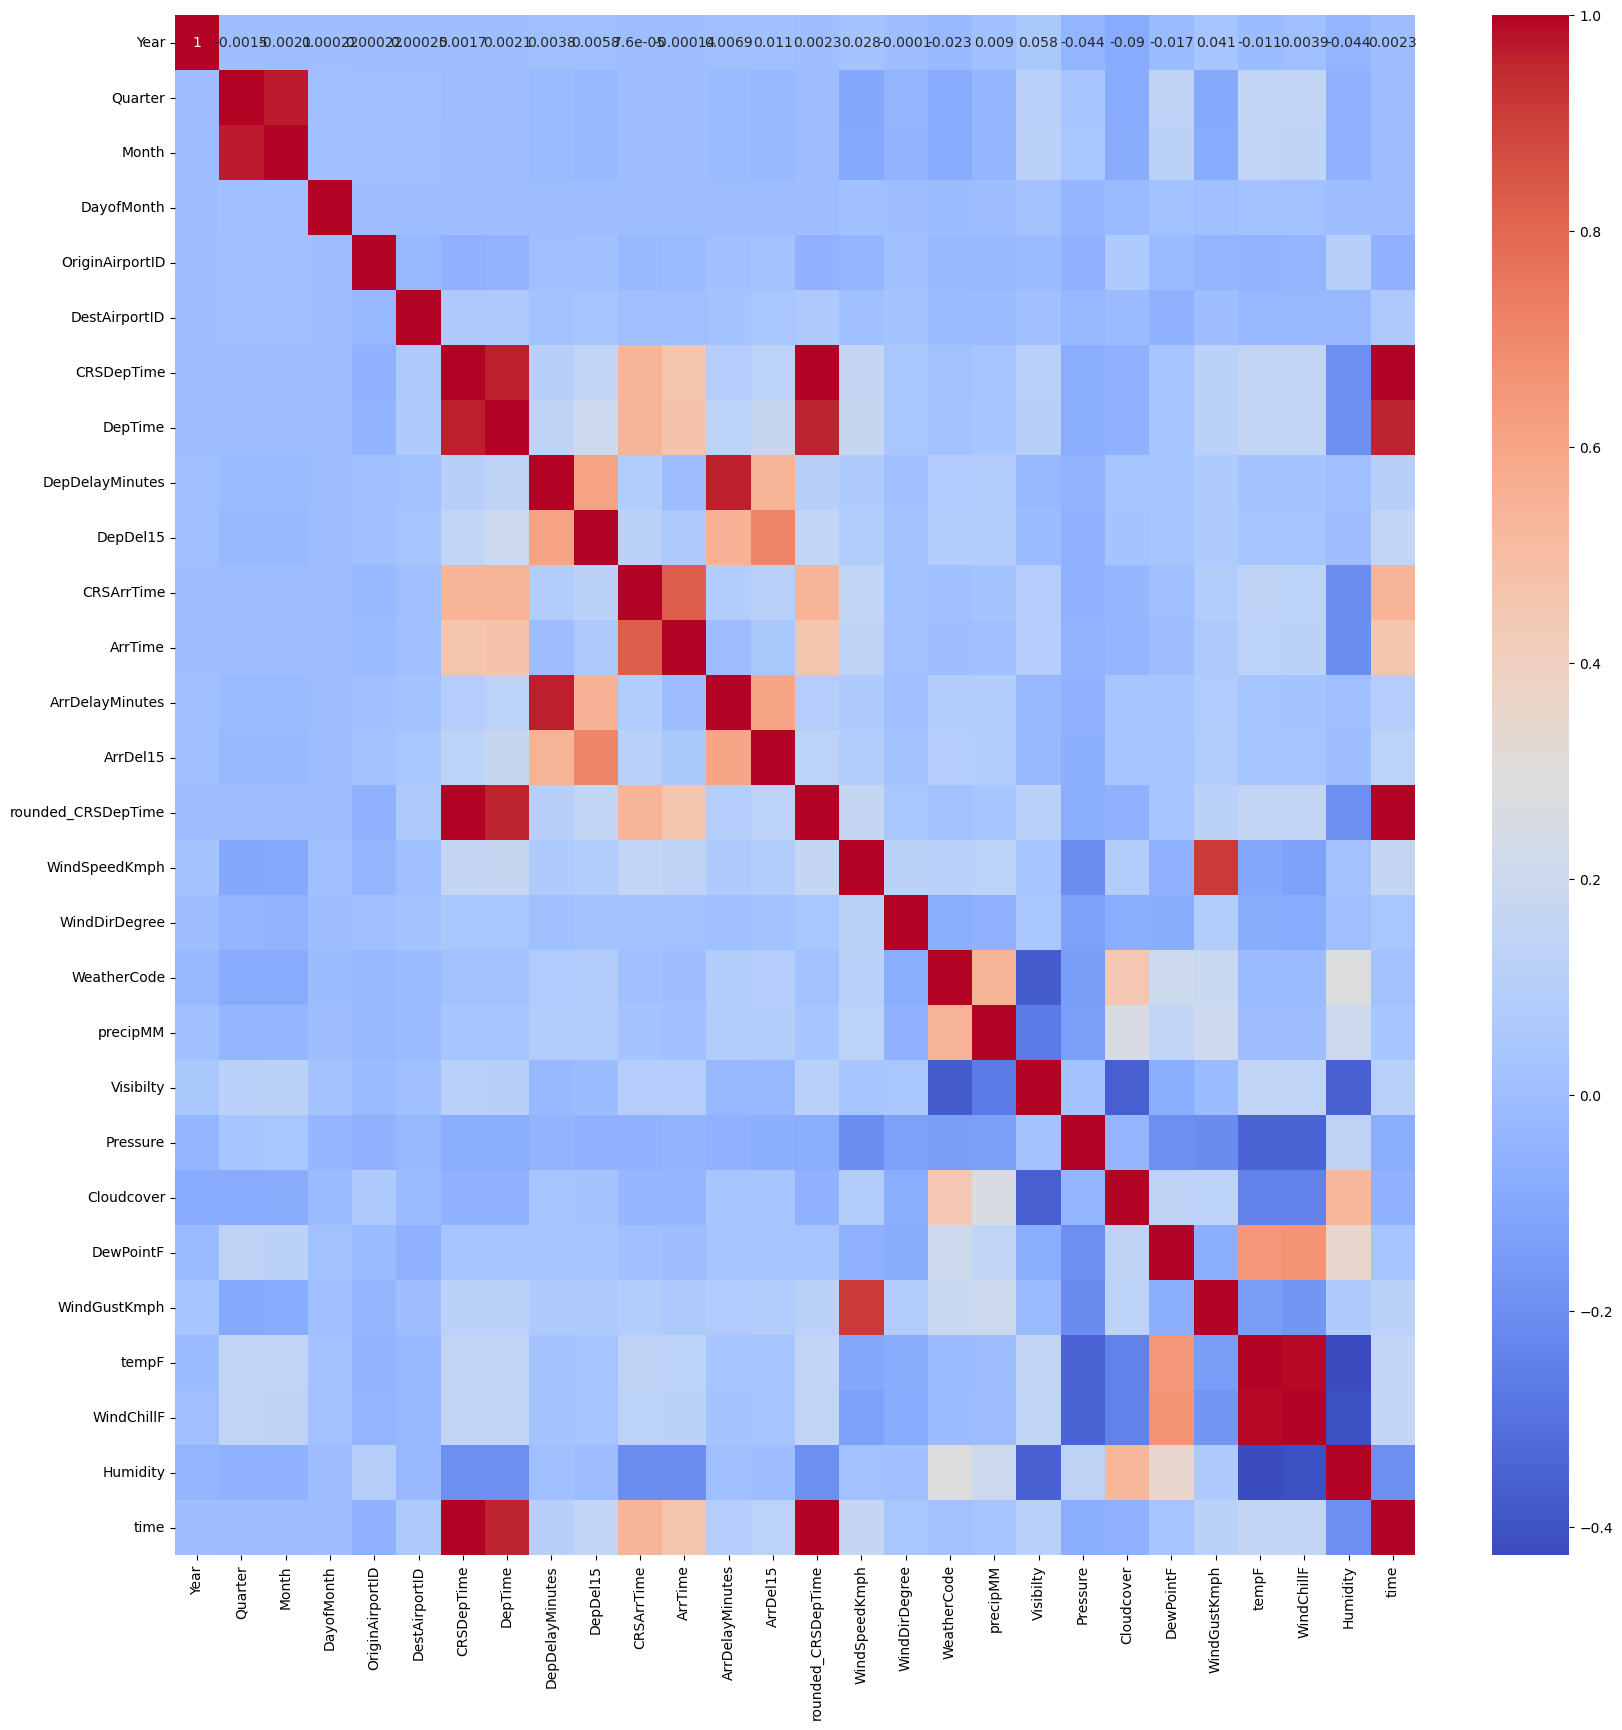

In [10]:
# Increase the figure size further
plt.figure(figsize=(20, 20))
sns.heatmap(corr_data, annot=True,cmap='coolwarm')

plt.show()

In [11]:
data_for_classification = numeric_data.drop(['CRSDepTime', 'DepTime','tempF', 'Quarter', 'DepDel15', 'time', 'ArrDelayMinutes', 'WindGustKmph', 'DewPointF'], axis = 1)

In [12]:
data_for_regression = numeric_data.drop(['CRSDepTime', 'DepTime', 'tempF', 'Quarter', 'time', 'WindGustKmph', 'DewPointF'], axis = 1) #Including DepDel15 and DepDelayMinutes for predicting properly

In [13]:
data_for_classification.columns

Index(['Year', 'Month', 'DayofMonth', 'OriginAirportID', 'DestAirportID',
       'DepDelayMinutes', 'CRSArrTime', 'ArrTime', 'ArrDel15',
       'rounded_CRSDepTime', 'WindSpeedKmph', 'WindDirDegree', 'WeatherCode',
       'precipMM', 'Visibilty', 'Pressure', 'Cloudcover', 'WindChillF',
       'Humidity'],
      dtype='object')

In [14]:
data_for_regression.columns

Index(['Year', 'Month', 'DayofMonth', 'OriginAirportID', 'DestAirportID',
       'DepDelayMinutes', 'DepDel15', 'CRSArrTime', 'ArrTime',
       'ArrDelayMinutes', 'ArrDel15', 'rounded_CRSDepTime', 'WindSpeedKmph',
       'WindDirDegree', 'WeatherCode', 'precipMM', 'Visibilty', 'Pressure',
       'Cloudcover', 'WindChillF', 'Humidity'],
      dtype='object')

In [13]:
# Assuming data_for_classification is your DataFrame

# List of columns to be scaled
columns_to_scale = [
    'WindSpeedKmph', 'WindDirDegree', 'WeatherCode', 'precipMM', 
    'Visibilty', 'Pressure', 'Cloudcover', 'WindChillF', 'Humidity'
]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the selected columns
data_for_classification[columns_to_scale] = scaler.fit_transform(data_for_classification[columns_to_scale])

In [14]:
# Assuming data_for_classification is your DataFrame

# List of columns to be scaled
columns_to_scale = [
    'WindSpeedKmph', 'WindDirDegree', 'WeatherCode', 'precipMM', 
    'Visibilty', 'Pressure', 'Cloudcover', 'WindChillF', 'Humidity'
]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the selected columns
data_for_regression[columns_to_scale] = scaler.fit_transform(data_for_regression[columns_to_scale])

In [15]:
data_for_classification.head()

,Year,Month,DayofMonth,OriginAirportID,DestAirportID,DepDelayMinutes,CRSArrTime,ArrTime,ArrDel15,rounded_CRSDepTime,WindSpeedKmph,WindDirDegree,WeatherCode,precipMM,Visibilty,Pressure,Cloudcover,WindChillF,Humidity
0,2016,8,27,11292,12889,0.0,656,650.0,0.0,600,0.152542,0.594444,0.000000,0.000000,0.50,0.516129,0.00,0.520548,0.814433
1,2016,8,27,12889,13204,0.0,1508,1500.0,0.0,800,0.084746,0.091667,0.308511,0.000000,0.45,0.467742,0.53,0.705479,0.453608
2,2016,8,27,13204,14771,5.0,43,43.0,0.0,2200,0.203390,0.197222,0.000000,0.000000,0.45,0.516129,0.02,0.678082,0.804124
3,2016,8,27,12892,13204,0.0,908,853.0,0.0,100,0.084746,0.566667,0.031915,0.003279,0.50,0.483871,0.98,0.616438,0.907216
4,2016,8,27,13204,12892,24.0,2335,2335.0,0.0,2100,0.220339,0.202778,0.000000,0.000000,0.50,0.516129,0.00,0.691781,0.762887


In [16]:
data_for_regression.columns

Index(['Year', 'Month', 'DayofMonth', 'OriginAirportID', 'DestAirportID',
       'DepDelayMinutes', 'CRSArrTime', 'ArrTime', 'ArrDelayMinutes',
       'ArrDel15', 'rounded_CRSDepTime', 'WindSpeedKmph', 'WindDirDegree',
       'WeatherCode', 'precipMM', 'Visibilty', 'Pressure', 'Cloudcover',
       'WindChillF', 'Humidity'],
      dtype='object')

In [62]:
data_for_classification.to_csv("data_classification_before_smote.csv")

In [20]:
data_for_regression.to_csv("data_for_regression_before_smote.csv")

**END OF EDA**